In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv("pd_speech_features.csv")
df.head()
df['class'].value_counts()

class
1    564
0    192
Name: count, dtype: int64

1) Sử dụng đoạn code chọn số chiều chính trong ví dụ 2, đưa tập dữ liệu đã đọc về còn 2 chiều, sau
đó hiển thị lên màn hình để xem quan hệ giữa các lớp dữ liệu.

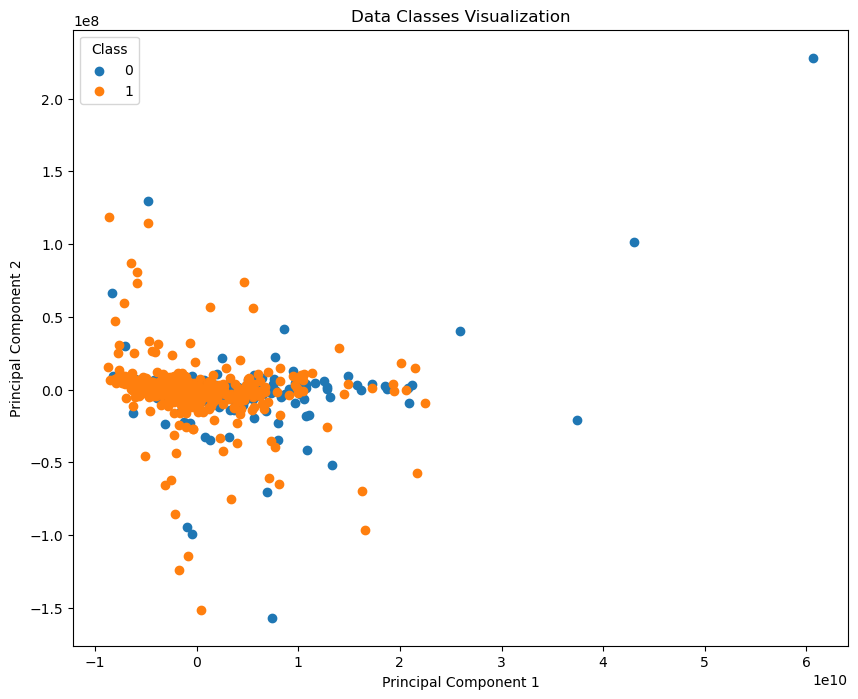

In [22]:
from sklearn.decomposition import PCA
import seaborn as sns

# Separate the features (X) and the target variable (y)
X = df.drop("class", axis=1)
y = df["class"]

# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot to visualize the data classes
plt.figure(figsize=(10, 8))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Class")
plt.title("Data Classes Visualization")
plt.show()

i. Chia dữ liệu thành Train – Test, sau đó thực hiện giảm chiều một cách phù hợp
và thực hiện bài toán phân loại. Lưu lại các kết quả.

Accuracy: 0.6513157894736842


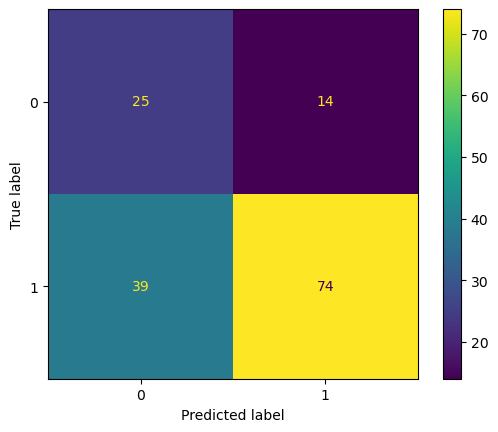

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
ConfusionMatrixDisplay(confusion_mat).plot()


ii. Thực hiện giảm chiều trên toàn bộ dữ liệu, sau đó chia thành dữ liệu train:test và
thực hiện bài toán phân loại.

Accuracy: 0.75


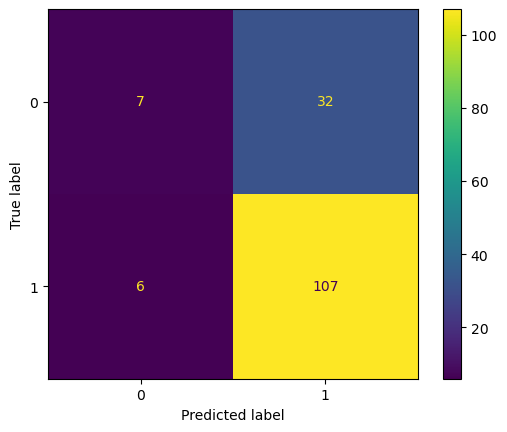

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=243)


# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
ConfusionMatrixDisplay(confusion_mat).plot()

Độ chính xác của i): Accuracy: 0.6513157894736842  
Độ chính xác của ii): Accuracy: 0.75  
Độ chính xác khi giảm chiều trước phù hợp hơn bởi vì bài toán có quá nhiều trường dẫn tới khi chia bộ dữ liệu thì các trường chính của tập test sẽ không phù hợp với tập train dẫn tới độ chính xác giảm. Ngược lại khi giảm chiều trước thì sẽ có 2 trường chính của cả tập dữ liệu, có thể không phù hợp nhất với 2 tập nhưng đặc trưng cho cả bộ